In [3]:
import geopandas as gpd

# Replace these file paths with the actual paths of your GeoPackage files
shape_index = "shape_index.gpkg"
dispersal_index = "dispersal_index.gpkg"

# Read the GeoPackage files into GeoDataFrames
gdf_shape = gpd.read_file(shape_index)
gdf_dispersal = gpd.read_file(dispersal_index)

# Merge the GeoDataFrames based on a common field (unique_id) using pandas merge
merged_gdf = gdf_shape.merge(gdf_dispersal[['fua_name', 'dispersal_index']], on='fua_name', how='left')

# Check if there are any NaN values in the 'dispersal_index' column (unmatched rows)
unmatched_rows = merged_gdf[merged_gdf['dispersal_index'].isnull()]
if not unmatched_rows.empty:
    print("Warning: Some rows in the first GeoPackage were not matched with the second GeoPackage.")
print(merged_gdf)
# Save the updated GeoDataFrame back to the first GeoPackage
# merged_gdf.to_file(first_gpkg_path, driver="GPKG")

    fid_1 country fua_code        fua_name      perimeter          area  \
0     1.0      AL  AL001L1          Tirana  309026.128094  1.669981e+09   
1     2.0      AL  AL003L1         Elbasan  218480.332363  1.259253e+09   
2     3.0      AL  AL004L1         Shkodër  316821.461414  1.850448e+09   
3     4.0      AL  AL005L0           Vlorë  257243.965482  6.373832e+08   
4    11.0      BA  BA001L1        Sarajevo  375239.589306  2.637223e+09   
5    12.0      BA  BA002L1      Banja Luka  438613.388538  2.750909e+09   
6    13.0      BA  BA003L1          Mostar  249958.847240  1.822697e+09   
7    14.0      BA  BA004L1           Tuzla  205246.041588  1.122959e+09   
8    15.0      BA  BA005L1          Zenica  181756.288489  8.654641e+08   
9   348.0      HR  HR001L2     Grad Zagreb  678974.046225  5.058614e+09   
10  349.0      HR  HR002L2          Rijeka  316502.928065  1.073226e+09   
11  350.0      HR  HR003L2  Slavonski Brod  237358.894566  9.775401e+08   
12  351.0      HR  HR004L

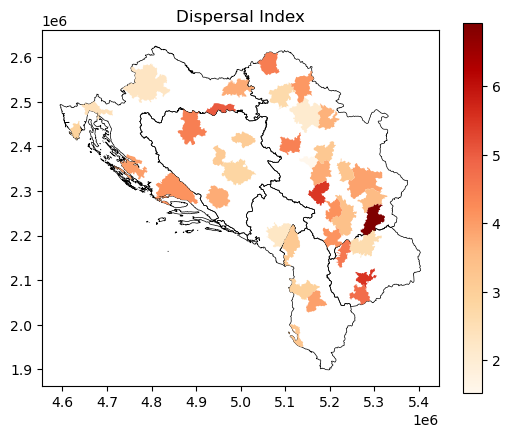

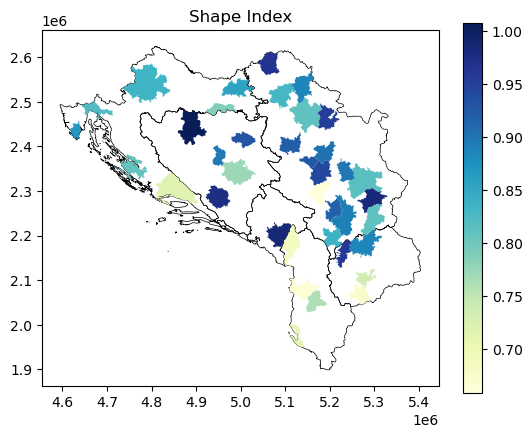

In [10]:
# Load the countries shapefile into a GeoDataFrame
countries_shp_path = "countries.shp"
countries_gdf = gpd.read_file(countries_shp_path)

# Assuming your GeoDataFrame with indices is named "gdf"

# Plot the countries shapefile
countries_gdf.plot(facecolor='none', edgecolor='black', linewidth=0.5)

# Plotting shape_index on top of countries
merged_gdf.plot(column='shape_index', cmap='OrRd', legend=True, ax=plt.gca())
# Add a title to the plot
plt.title("Dispersal Index")
# Show the plot
plt.show()


# Plot the countries shapefile
countries_gdf.plot(facecolor='none', edgecolor='black', linewidth=0.5)

# Plotting dispersal_index on top of countries
merged_gdf.plot(column='dispersal_index', cmap='YlGnBu', legend=True, ax=plt.gca())

# Add a title to the plot
plt.title("Shape Index")
# Show the plot
plt.show()


### Reclassifying indices

In [18]:
import pandas as pd
# Classify Shape Index into categories
shape_index_categories = pd.qcut(merged_gdf['shape_index'], q=[0, 0.25, 0.50, 0.75, 1.0],
                                 labels=['Very Low', 'Low', 'Medium', 'High'])
merged_gdf['shape_index_category'] = shape_index_categories

# Classify Dispersal Index into categories
dispersal_index_categories = pd.qcut(merged_gdf['dispersal_index'], q=[0, 0.25, 0.50, 0.75, 1.0],
                                     labels=['Very Low', 'Low', 'Medium', 'High'])
merged_gdf['dispersal_index_category'] = dispersal_index_categories

In [19]:
print (merged_gdf)

    fid_1 country fua_code        fua_name      perimeter          area  \
0     1.0      AL  AL001L1          Tirana  309026.128094  1.669981e+09   
1     2.0      AL  AL003L1         Elbasan  218480.332363  1.259253e+09   
2     3.0      AL  AL004L1         Shkodër  316821.461414  1.850448e+09   
3     4.0      AL  AL005L0           Vlorë  257243.965482  6.373832e+08   
4    11.0      BA  BA001L1        Sarajevo  375239.589306  2.637223e+09   
5    12.0      BA  BA002L1      Banja Luka  438613.388538  2.750909e+09   
6    13.0      BA  BA003L1          Mostar  249958.847240  1.822697e+09   
7    14.0      BA  BA004L1           Tuzla  205246.041588  1.122959e+09   
8    15.0      BA  BA005L1          Zenica  181756.288489  8.654641e+08   
9   348.0      HR  HR001L2     Grad Zagreb  678974.046225  5.058614e+09   
10  349.0      HR  HR002L2          Rijeka  316502.928065  1.073226e+09   
11  350.0      HR  HR003L2  Slavonski Brod  237358.894566  9.775401e+08   
12  351.0      HR  HR004L

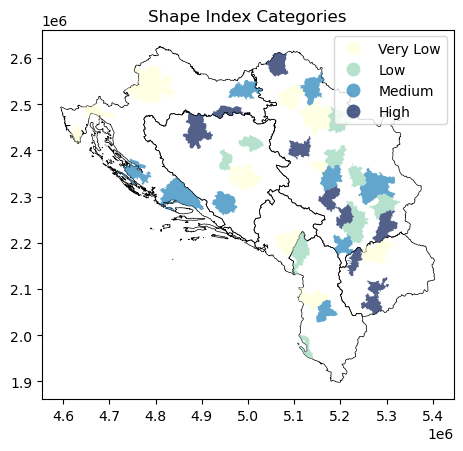

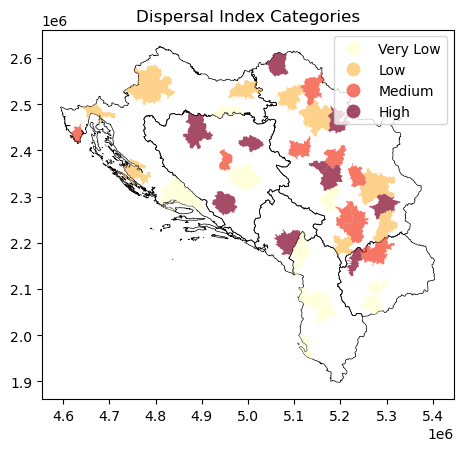

In [24]:
# Plot the countries shapefile
countries_gdf.plot(facecolor='none', edgecolor='black', linewidth=0.5)
# Create a custom colormap for the Shape Index categories
shape_index_cmap = 'YlGnBu'
# Plot the Shape Index categories
merged_gdf.plot(column='shape_index_category', cmap=shape_index_cmap, legend=True, ax=plt.gca(), alpha=0.7)
# Add title
plt.title("Shape Index Categories")
# Show the plot
plt.show()


# Plot the countries shapefile
countries_gdf.plot(facecolor='none', edgecolor='black', linewidth=0.5)
# Create a custom colormap for the Dispersal Index categories
dispersal_index_cmap = 'YlOrRd'
# Plot the Dispersal Index categories
merged_gdf.plot(column='dispersal_index_category', cmap=dispersal_index_cmap, legend=True, ax=plt.gca(), alpha=0.7)
# Add title
plt.title("Dispersal Index Categories")
# Show the plot
plt.show()

In [31]:
import pandas as pd

# Assuming your GeoDataFrame is named "merged_gdf"

# Define the classification categories and their corresponding numeric labels
category_mapping = {
    'Low Shape Index + Low Dispersal Index': 1,
    'Low Shape Index + Medium Dispersal Index': 2,
    'Low Shape Index + High Dispersal Index': 3,
    'Medium Shape Index + Low Dispersal Index': 4,
    'Medium Shape Index + Medium Dispersal Index': 5,
    'Medium Shape Index + High Dispersal Index': 6,
    'High Shape Index + Low Dispersal Index': 7,
    'High Shape Index + Medium Dispersal Index': 8,
    'High Shape Index + High Dispersal Index': 9
}

# Convert the Categorical columns to strings
merged_gdf['shape_index_category'] = merged_gdf['shape_index_category'].astype(str)
merged_gdf['dispersal_index_category'] = merged_gdf['dispersal_index_category'].astype(str)

# Create a new column for combined categories with numeric labels
merged_gdf['combined_category'] = (
    merged_gdf['shape_index_category'] + ' Shape Index + ' + merged_gdf['dispersal_index_category'] + ' Dispersal Index'
)

# Map the combined categories to their corresponding numeric labels
merged_gdf['combined_category_label'] = merged_gdf['combined_category'].map(category_mapping)

# Drop the temporary combined category column if you don't need it in the final GeoDataFrame
merged_gdf.drop(columns=['combined_category'], inplace=True)

# Now, the 'combined_category_label' column in the GeoDataFrame contains the new combined index.



In [33]:
print(merged_gdf)

    fid_1 country fua_code        fua_name      perimeter          area  \
0     1.0      AL  AL001L1          Tirana  309026.128094  1.669981e+09   
1     2.0      AL  AL003L1         Elbasan  218480.332363  1.259253e+09   
2     3.0      AL  AL004L1         Shkodër  316821.461414  1.850448e+09   
3     4.0      AL  AL005L0           Vlorë  257243.965482  6.373832e+08   
4    11.0      BA  BA001L1        Sarajevo  375239.589306  2.637223e+09   
5    12.0      BA  BA002L1      Banja Luka  438613.388538  2.750909e+09   
6    13.0      BA  BA003L1          Mostar  249958.847240  1.822697e+09   
7    14.0      BA  BA004L1           Tuzla  205246.041588  1.122959e+09   
8    15.0      BA  BA005L1          Zenica  181756.288489  8.654641e+08   
9   348.0      HR  HR001L2     Grad Zagreb  678974.046225  5.058614e+09   
10  349.0      HR  HR002L2          Rijeka  316502.928065  1.073226e+09   
11  350.0      HR  HR003L2  Slavonski Brod  237358.894566  9.775401e+08   
12  351.0      HR  HR004L

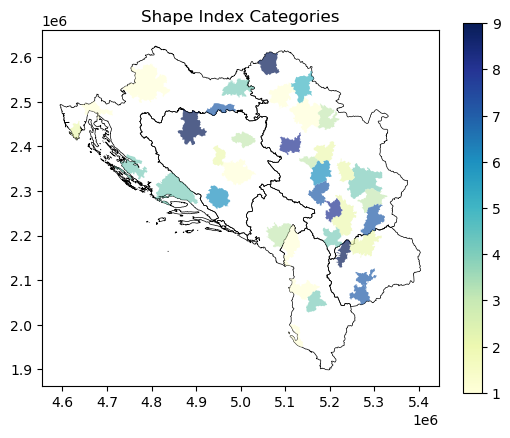

    fid_1 country fua_code        fua_name      perimeter          area  \
0     1.0      AL  AL001L1          Tirana  309026.128094  1.669981e+09   
1     2.0      AL  AL003L1         Elbasan  218480.332363  1.259253e+09   
2     3.0      AL  AL004L1         Shkodër  316821.461414  1.850448e+09   
3     4.0      AL  AL005L0           Vlorë  257243.965482  6.373832e+08   
4    11.0      BA  BA001L1        Sarajevo  375239.589306  2.637223e+09   
5    12.0      BA  BA002L1      Banja Luka  438613.388538  2.750909e+09   
6    13.0      BA  BA003L1          Mostar  249958.847240  1.822697e+09   
7    14.0      BA  BA004L1           Tuzla  205246.041588  1.122959e+09   
8    15.0      BA  BA005L1          Zenica  181756.288489  8.654641e+08   
9   348.0      HR  HR001L2     Grad Zagreb  678974.046225  5.058614e+09   
10  349.0      HR  HR002L2          Rijeka  316502.928065  1.073226e+09   
11  350.0      HR  HR003L2  Slavonski Brod  237358.894566  9.775401e+08   
12  351.0      HR  HR004L

In [35]:
# Plot the countries shapefile
countries_gdf.plot(facecolor='none', edgecolor='black', linewidth=0.5)
# Create a custom colormap for the Shape Index categories
shape_index_cmap = 'YlGnBu'
# Plot the Shape Index categories
merged_gdf.plot(column='combined_category_label', cmap=shape_index_cmap, legend = True, ax=plt.gca(), alpha=0.7)
# Add title
plt.title("Shape Index Categories")
# Show the plot
plt.show()
print(merged_gdf)

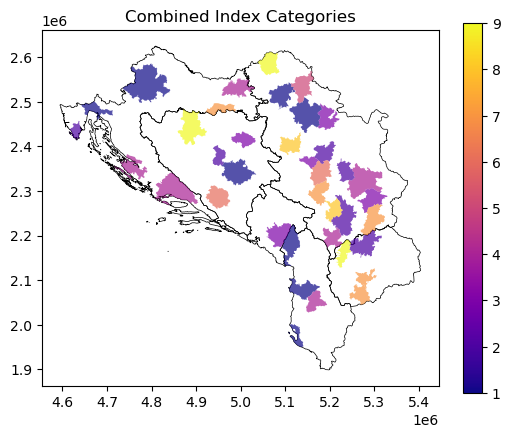

In [39]:
import matplotlib.pyplot as plt

# Plot the countries shapefile
countries_gdf.plot(facecolor='none', edgecolor='black', linewidth=0.5)

# Create a custom colormap for the Shape Index categories
shape_index_cmap = 'plasma'

# Plot the Shape Index categories
merged_gdf.plot(column='combined_category_label', cmap=shape_index_cmap, legend=True, ax=plt.gca(), alpha=0.7)

# Add title
plt.title("Combined Index Categories")

# Show the plot
plt.show()
